Part 1

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mat = loadmat('ex7data2') #load of data

In [3]:
X = mat['X']

In [4]:
K = 3
iterations = 10

In [5]:
def kMeansInitCentroids(X, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        rand_ind = np.random.randint(len(X))
        centroids[i] = X[rand_ind]
    return centroids

In [6]:
def findClosestCentroids(X, centroids):
    m = len(X)
    
    idx = [0.0 for i in range(m)]
    
    for i in range(m):
        min_d = float('inf')
        for j in range(len(centroids)):
            dis = np.sqrt(np.sum(np.square(X[i] - centroids[j])))
            if dis < min_d:
                min_d = dis
                idx[i] = j
    return np.array(idx)

In [10]:
def computeMeans(X, idx, K):
    m = len(X)
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        summ = np.zeros((1, X.shape[1]))
        cnt = 0
        for i in range(m):
            if idx[i] == k:
                summ += X[i]
                cnt += 1
        centroids[k] = summ/cnt
    return centroids

In [11]:
def plotProgresskMeans(X, centroids, previous, idx, K):
    colors = [plt.cm.tab20(float(i) / 10) for i in idx]
    plt.scatter(X[:,0], X[:,1], c=colors, s=2)
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='k', s=100, linewidth=1)
    for j in range(K):
        plt.plot([centroids[j][0], previous[j][0]], [centroids[j][1], previous[j][1]], c='k')

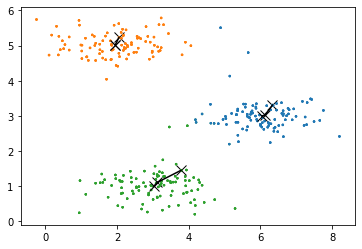

In [13]:
centroids = kMeansInitCentroids(X, K)
previous_centroids = centroids

for i in range(iterations):
    idx = findClosestCentroids(X, centroids)
    plotProgresskMeans(X, centroids, previous_centroids, idx, K)
    previous_centroids = centroids
    centroids = computeMeans(X, idx, K)
    if ((centroids == previous_centroids).all()):
        break

Part 2

In [151]:
mat = loadmat('bird_small') #load of data

In [203]:
A = mat['A']

In [204]:
A = A / 255
size = A.shape
X = A.reshape(size[0] * size[1], 3)

In [205]:
K = 16

In [206]:
def kMeansInitCentroids(X, K):
    randidx = np.random.permutation(len(X))
    centroids = X[randidx[0:K]]
    return centroids

In [211]:
def computeMeans(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        centroids[k] = np.mean(X[idx.ravel() == k], axis=0)
    return centroids

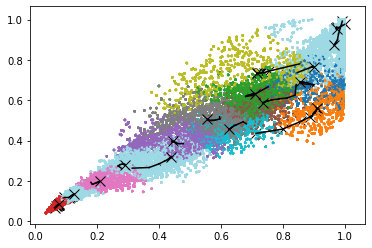

In [212]:
centroids = kMeansInitCentroids(X, K)
previous_centroids = centroids

for i in range(iterations):
    idx = findClosestCentroids(X, centroids)
    plotProgresskMeans(X, centroids, previous_centroids, idx, K)
    previous_centroids = centroids
    centroids = computeMeans(X, idx, K)
    if ((centroids == previous_centroids).all()):
        break

In [213]:
idx = findClosestCentroids(X_img, centroids)
X_recovered = centroids[idx]
X_recovered = X_recovered.reshape(size[0], size[1], 3)

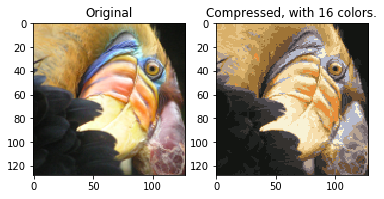

In [214]:
plt.subplot(1, 2, 1)
plt.imshow(A) 
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(X_recovered)
plt.title('Compressed, with 16 colors.')
plt.show()